In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = requests.get(url)
resultado = json.loads(df.text)

df_n = pd.json_normalize(resultado, sep = ' ')
df_Telecom = pd.DataFrame(df_n)
df_Telecom = df_Telecom.drop_duplicates()
df_Telecom.head(10)

,customerID,Churn,customer gender,customer SeniorCitizen,customer Partner,customer Dependents,customer tenure,phone PhoneService,phone MultipleLines,internet InternetService,...,internet OnlineBackup,internet DeviceProtection,internet TechSupport,internet StreamingTV,internet StreamingMovies,account Contract,account PaperlessBilling,account PaymentMethod,account Charges Monthly,account Charges Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [4]:
df_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer gender            7267 non-null   object 
 3   customer SeniorCitizen     7267 non-null   int64  
 4   customer Partner           7267 non-null   object 
 5   customer Dependents        7267 non-null   object 
 6   customer tenure            7267 non-null   int64  
 7   phone PhoneService         7267 non-null   object 
 8   phone MultipleLines        7267 non-null   object 
 9   internet InternetService   7267 non-null   object 
 10  internet OnlineSecurity    7267 non-null   object 
 11  internet OnlineBackup      7267 non-null   object 
 12  internet DeviceProtection  7267 non-null   object 
 13  internet TechSupport       7267 non-null   objec

In [5]:
pd.unique(df_Telecom['customerID'])

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], shape=(7267,), dtype=object)

In [6]:
df_Telecom['account Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [7]:
df_Telecom['account Contract'] = df_Telecom['account Contract'].str.replace('-', ' ', regex=True)
df_Telecom['account Contract'].unique()

array(['One year', 'Month to month', 'Two year'], dtype=object)

In [8]:
df_Telecom['account PaymentMethod'] = df_Telecom['account PaymentMethod'].str.replace(' (automatic)', ' ')
df_Telecom['account PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card ',
       'Bank transfer '], dtype=object)

In [9]:
df_Telecom['account Charges Total'] = df_Telecom['account Charges Total'].replace(' ', '0')
df_Telecom['account Charges Total']= df_Telecom['account Charges Total'].astype(np.float64)

In [10]:
df_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer gender            7267 non-null   object 
 3   customer SeniorCitizen     7267 non-null   int64  
 4   customer Partner           7267 non-null   object 
 5   customer Dependents        7267 non-null   object 
 6   customer tenure            7267 non-null   int64  
 7   phone PhoneService         7267 non-null   object 
 8   phone MultipleLines        7267 non-null   object 
 9   internet InternetService   7267 non-null   object 
 10  internet OnlineSecurity    7267 non-null   object 
 11  internet OnlineBackup      7267 non-null   object 
 12  internet DeviceProtection  7267 non-null   object 
 13  internet TechSupport       7267 non-null   objec

In [11]:
df_Telecom[['customer SeniorCitizen', 'customer tenure']]= df_Telecom[['customer SeniorCitizen', 'customer tenure']].astype(np.int64)

In [12]:
df_Telecom['Contas_Diarias'] = df_Telecom['account Charges Monthly']/30
df_Telecom

,customerID,Churn,customer gender,customer SeniorCitizen,customer Partner,customer Dependents,customer tenure,phone PhoneService,phone MultipleLines,internet InternetService,...,internet DeviceProtection,internet TechSupport,internet StreamingTV,internet StreamingMovies,account Contract,account PaperlessBilling,account PaymentMethod,account Charges Monthly,account Charges Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month to month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month to month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [13]:
df_Telecom.describe()

,customer SeniorCitizen,customer tenure,account Charges Monthly,account Charges Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [14]:
evasao = df_Telecom.groupby('Churn')[['customerID']].count()

In [15]:
evasao

,customerID
Churn,
,224
No,5174
Yes,1869


In [16]:
evasao.columns = ['Quantidade']

In [17]:
evasao['Percentual'] = round((evasao['Quantidade'] / evasao['Quantidade'].sum()) * 100,1)
evasao

,Quantidade,Percentual
Churn,,
,224,3.1
No,5174,71.2
Yes,1869,25.7


In [18]:
evasao = evasao.query('Churn == "Yes" | Churn == "No"')

In [19]:
evasao.reset_index(inplace=True)

In [20]:
evasao = evasao.copy()
evasao.loc[evasao['Churn'] == 'Yes', 'Churn'] = 'Evadiu'
evasao.loc[evasao['Churn'] == 'No', 'Churn'] = 'Permanece'
evasao

,Churn,Quantidade,Percentual
0,Permanece,5174,71.2
1,Evadiu,1869,25.7


In [21]:
evasao.query('Churn == "Sim"')['Quantidade']

Series([], Name: Quantidade, dtype: int64)

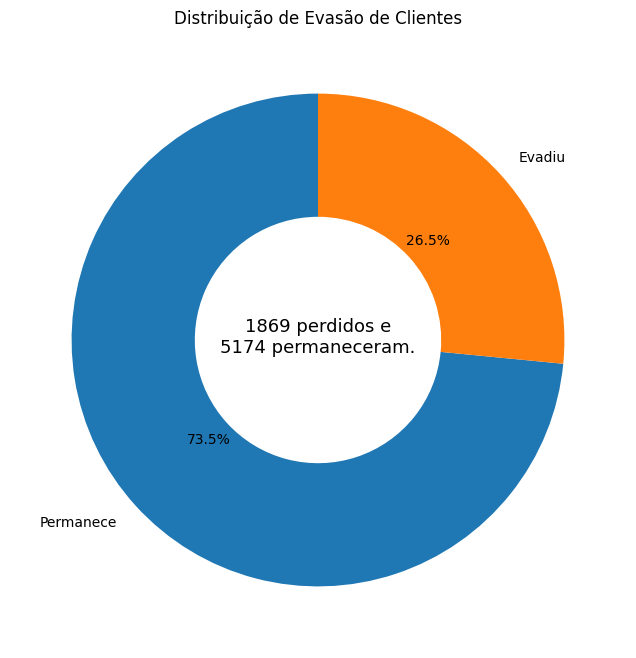

In [22]:
plt.figure(figsize=(10, 8))
plt.pie(
    evasao['Quantidade'],
    labels=evasao['Churn'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.5}
)
plt.title('Distribuição de Evasão de Clientes')

# Texto adicional dentro do gráfico

valor_sim = evasao.loc[evasao['Churn'] == "Evadiu", 'Quantidade'].values[0]
valor_nao = evasao.loc[evasao['Churn'] == "Permanece", 'Quantidade'].values[0]
texto = f"{valor_sim} perdidos e\n" f"{valor_nao} permaneceram."

plt.text(0, -0.05, texto, fontsize=13, ha='center')

plt.show()

In [23]:
evasao_genero = (
    df_Telecom.loc[df_Telecom['Churn'].isin(['Yes', 'No'])]
    .groupby(['customer gender', 'Churn'], as_index=False)['customerID']
    .count()
    .replace({'customer gender': {'Female': 'Feminino', 'Male': 'Masculino'}})
    .replace({'Churn': {'No': 'Não', 'Yes': 'Sim'}})
    .rename(columns={'customer gender': 'Genero', 'customerID': 'Quantidade'})
)
evasao_genero

,Genero,Churn,Quantidade
0,Feminino,Não,2549
1,Feminino,Sim,939
2,Masculino,Não,2625
3,Masculino,Sim,930


In [24]:
evasao_genero = (
    df_Telecom.loc[df_Telecom['Churn'].isin(['Yes', 'No'])]
    .groupby(['customer gender', 'Churn'], as_index=False)['customerID']
    .count()
    .replace({'customer gender': {'Female': 'Feminino', 'Male': 'Masculino'}})
    .replace({'Churn': {'No': 'Permanece', 'Yes': 'Evadiu'}})
    .rename(columns={'customer gender': 'Genero', 'customerID': 'Quantidade'})
    .pivot(index='Genero', columns='Churn', values='Quantidade')  # transforma em colunas
    .reset_index()
)

evasao_genero


Churn,Genero,Evadiu,Permanece
0,Feminino,939,2549
1,Masculino,930,2625


In [25]:
evasao_contrato = (
    df_Telecom.loc[df_Telecom['Churn'].isin(['Yes', 'No'])]
    .groupby(['account Contract', 'Churn'], as_index=False)['customerID']
    .count()
    .replace({'account Contract': {'Month to month': 'Mensal', 'One year': 'Anual', 'Two year': 'Bianual'}})
    .replace({'Churn': {'No': 'Permanece', 'Yes': 'Evadiu'}})
    .rename(columns={'account Contract': 'Contrato', 'customerID': 'Quantidade'})
    .pivot(index='Contrato', columns='Churn', values='Quantidade')  # transforma em colunas
    .reset_index()
)

evasao_contrato


Churn,Contrato,Evadiu,Permanece
0,Anual,166,1307
1,Bianual,48,1647
2,Mensal,1655,2220


In [26]:
evasao_servico = (
    df_Telecom.loc[df_Telecom['Churn'].isin(['Yes', 'No'])]
    .groupby(['internet InternetService', 'Churn'], as_index=False)['customerID']
    .count()
    .replace({'internet InternetService': {'Fiber optic': 'Fibra Óptica', 'DSL': 'DSL', 'No': 'Sem Internet'}})
    .replace({'Churn': {'No': 'Permanece', 'Yes': 'Evadiu'}})
    .rename(columns={'internet InternetService': 'Internet', 'customerID': 'Quantidade'})
    .pivot(index='Internet', columns='Churn', values='Quantidade')  # transforma em colunas
    .reset_index()
)

evasao_servico


Churn,Internet,Evadiu,Permanece
0,DSL,459,1962
1,Fibra Óptica,1297,1799
2,Sem Internet,113,1413


In [27]:
evasao_senioridade = (
    df_Telecom.loc[df_Telecom['Churn'].isin(['Yes', 'No'])]
    .groupby(['customer SeniorCitizen', 'Churn'], as_index=False)['customerID']
    .count()
    .replace({'customer SeniorCitizen': {0: 'Não Idoso', 1: 'Idoso'}})
    .replace({'Churn': {'No': 'Permanece', 'Yes': 'Evadiu'}})
    .rename(columns={'customer SeniorCitizen': 'Senioridade', 'customerID': 'Quantidade'})
    .pivot(index='Senioridade', columns='Churn', values='Quantidade')  # transforma em colunas
    .reset_index()
)

evasao_senioridade


Churn,Senioridade,Evadiu,Permanece
0,Idoso,476,666
1,Não Idoso,1393,4508


<Figure size 1000x600 with 0 Axes>

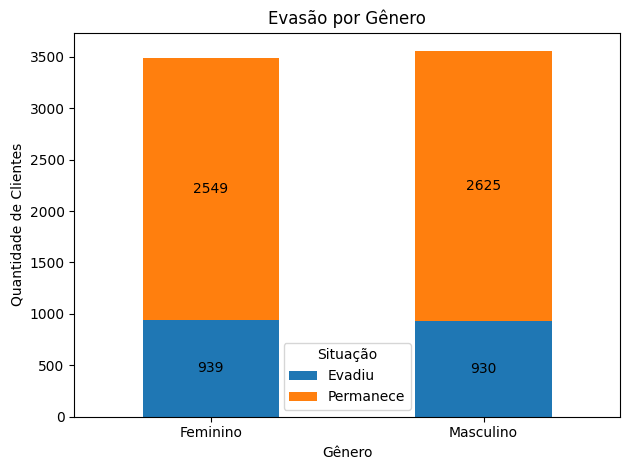

In [28]:
plt.figure(figsize=(10, 6))

ax = evasao_genero.plot(
    kind='bar',
    x='Genero',
    stacked=True
)

for p in ax.patches:
    largura = p.get_width()
    altura = p.get_height()
    x = p.get_x()
    y = p.get_y()

    if altura > 0:
        ax.text(
            x + largura / 2,
            y + altura / 2,
            f'{int(altura)}',
            ha='center',
            va='center',
            fontsize=10,
            color='black'
        )

plt.xticks(rotation=0)
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Clientes')
plt.title('Evasão por Gênero')
plt.legend(title='Situação')
plt.tight_layout()
plt.show()


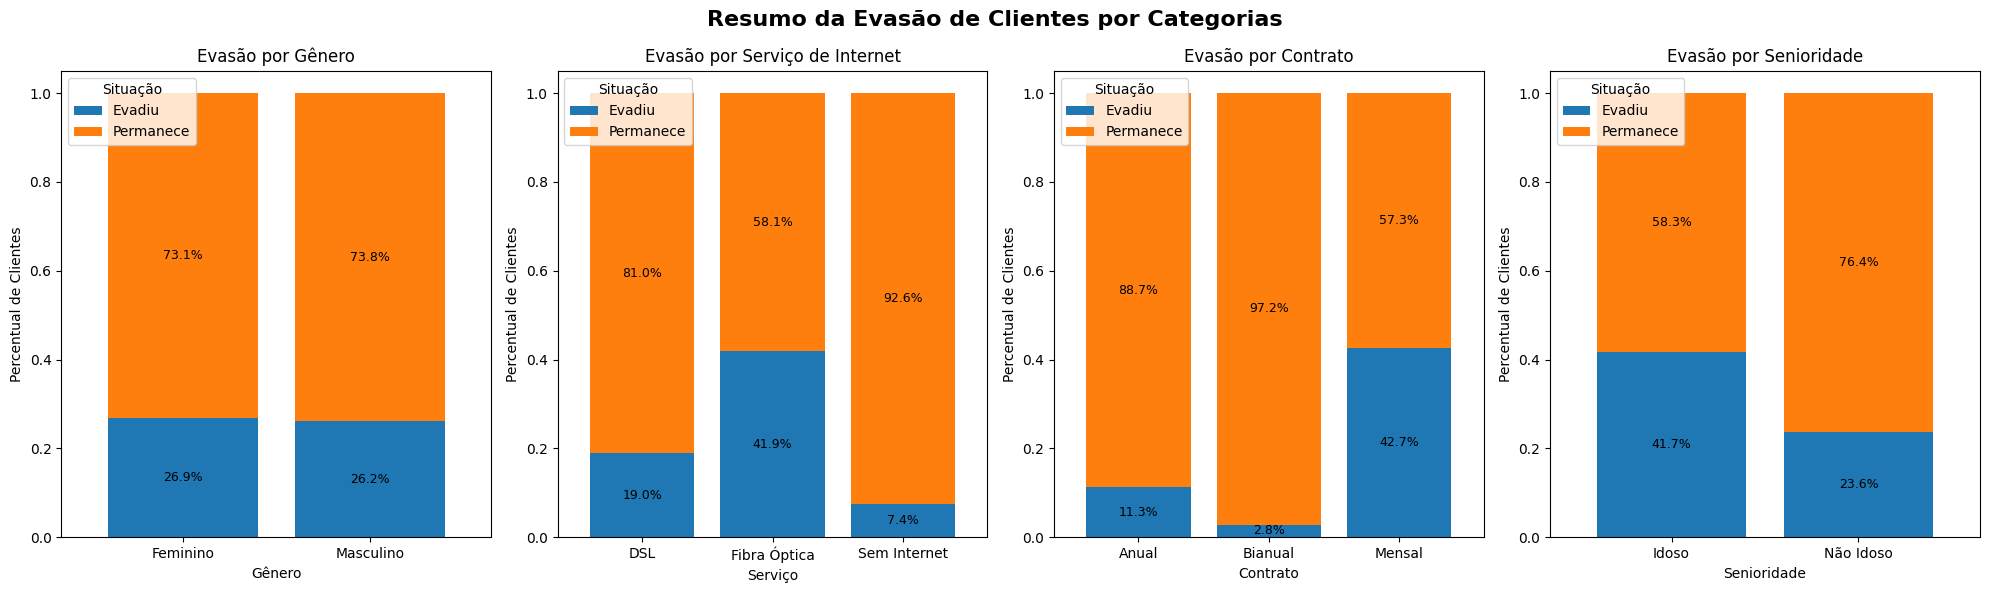

In [ ]:
def plot_categorias(ax, df, x_col, title, xlabel):
    # Plotando o gráfico empilhado
    df_plot = df.set_index(x_col)
    df_plot_norm = df_plot.div(df_plot.sum(axis=1), axis=0)  # Normaliza para percentual
    df_plot_norm.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.8)

    # Adicionando os percentuais dentro das barras
    for i, row in enumerate(df_plot_norm.itertuples(index=False)):
        cumul = 0  # acumulador para empilhamento
        for j, valor in enumerate(row):
            if valor > 0:
                ax.text(
                    i, 
                    cumul + valor / 2,  # posição vertical central da barra
                    f'{valor*100:.1f}%',  # percentual formatado
                    ha='center', 
                    va='center',
                    fontsize=9,
                    color='black'
                )
                cumul += valor  # atualiza acumulador

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentual de Clientes')
    ax.legend(title='Situação', loc='upper left')
    ax.tick_params(axis='x', rotation=0)


fig, axes = plt.subplots(1, 4, figsize=(20, 6))

plot_categorias(axes[0], evasao_genero, 'Genero', 'Evasão por Gênero', 'Gênero')
plot_categorias(axes[1], evasao_servico, 'Internet', 'Evasão por Serviço de Internet', 'Serviço')
plot_categorias(axes[2], evasao_contrato, 'Contrato', 'Evasão por Contrato', 'Contrato')
plot_categorias(axes[3], evasao_senioridade, 'Senioridade', 'Evasão por Senioridade', 'Senioridade')

fig.suptitle("Resumo da Evasão de Clientes por Categorias", fontsize=16, fontweight='bold') 

plt.tight_layout()
plt.show()

In [32]:
evasao_total = (
    df_Telecom.loc[df_Telecom['Churn'].isin(['Yes', 'No'])]
    .groupby(['Churn','account Charges Total','customer tenure'], as_index=False)['customerID']
    .count()
    .replace({'Churn': {'No': 'Permanece', 'Yes': 'Evadiu'}})
    # .pivot(index='Senioridade', columns='Churn', values='Quantidade')  # transforma em colunas
    # .reset_index()a
)

evasao_total


,Churn,account Charges Total,customer tenure,customerID
0,Permanece,0.00,0,11
1,Permanece,18.80,1,1
2,Permanece,18.85,1,1
3,Permanece,18.90,1,1
4,Permanece,19.00,1,1
...,...,...,...,...
6826,Evadiu,7856.00,68,1
6827,Evadiu,7968.85,70,1
6828,Evadiu,8109.80,72,1
6829,Evadiu,8127.60,70,1


In [33]:
evasao_total.head(10)

,Churn,account Charges Total,customer tenure,customerID
0,Permanece,0.00,0,11
1,Permanece,18.80,1,1
2,Permanece,18.85,1,1
3,Permanece,18.90,1,1
4,Permanece,19.00,1,1
5,Permanece,19.05,1,1
6,Permanece,19.10,1,2
7,Permanece,19.15,1,1
8,Permanece,19.20,1,4
9,Permanece,19.25,1,2


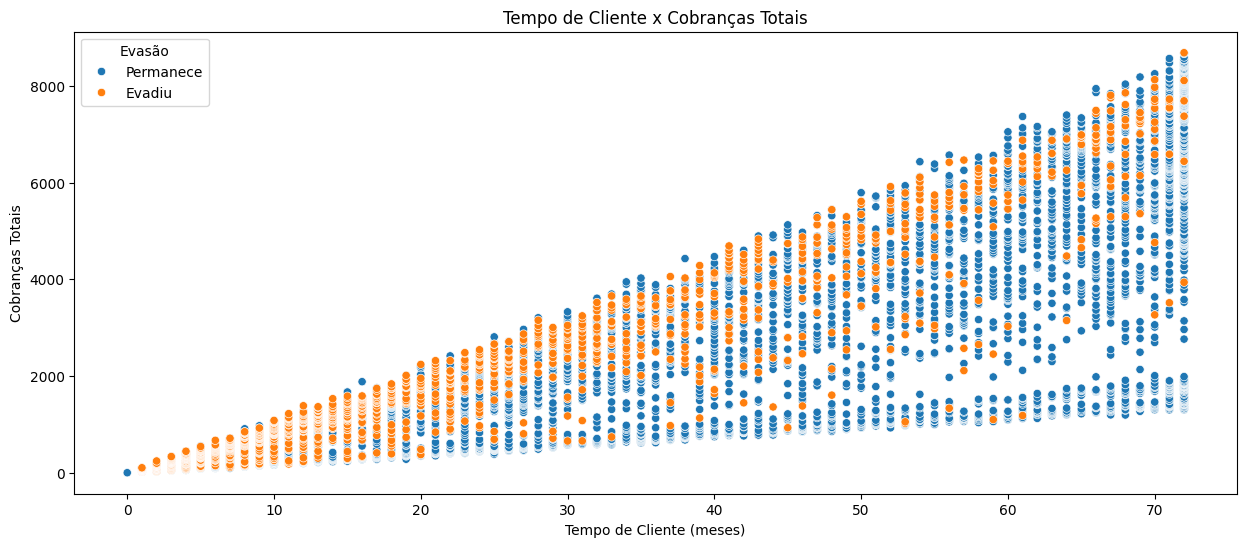

In [34]:
def plot_evasao_total():
    plt.figure(figsize=(15, 6))
    sns.scatterplot(data=evasao_total, x='customer tenure', y='account Charges Total', hue='Churn')
    plt.title('Tempo de Cliente x Cobranças Totais')
    plt.xlabel('Tempo de Cliente (meses)')
    plt.ylabel('Cobranças Totais')
    plt.legend(title='Evasão', loc='upper left')
    plt.show()

plot_evasao_total()

In [35]:
# Definição de funções para plotagem
def plot_percentual_evasao(ax):
    wedges, texts, autotexts = ax.pie(
        evasao['Quantidade'],
        labels=evasao['Churn'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width': 0.5}
    )
    ax.set_title('Distribuição de Evasão de Clientes')

    valor_sim = evasao.loc[evasao['Churn'] == "Evadiu", 'Quantidade'].values[0]
    valor_nao = evasao.loc[evasao['Churn'] == "Permanece", 'Quantidade'].values[0]
    texto = f"{valor_sim} evadiu e\n{valor_nao} permanece."

    ax.text(0, -0.05, texto, fontsize=11, ha='center')

def plot_evasao_total(ax):
    sns.scatterplot(
        data=evasao_total,
        x='customer tenure',
        y='account Charges Total',
        hue='Churn',
        ax=ax
    )
    ax.set_title('Tempo de Cliente x Cobranças Totais')
    ax.set_xlabel('Tempo de Cliente (meses)')
    ax.set_ylabel('Cobranças Totais')
    ax.legend(title='Situação', loc='upper left')

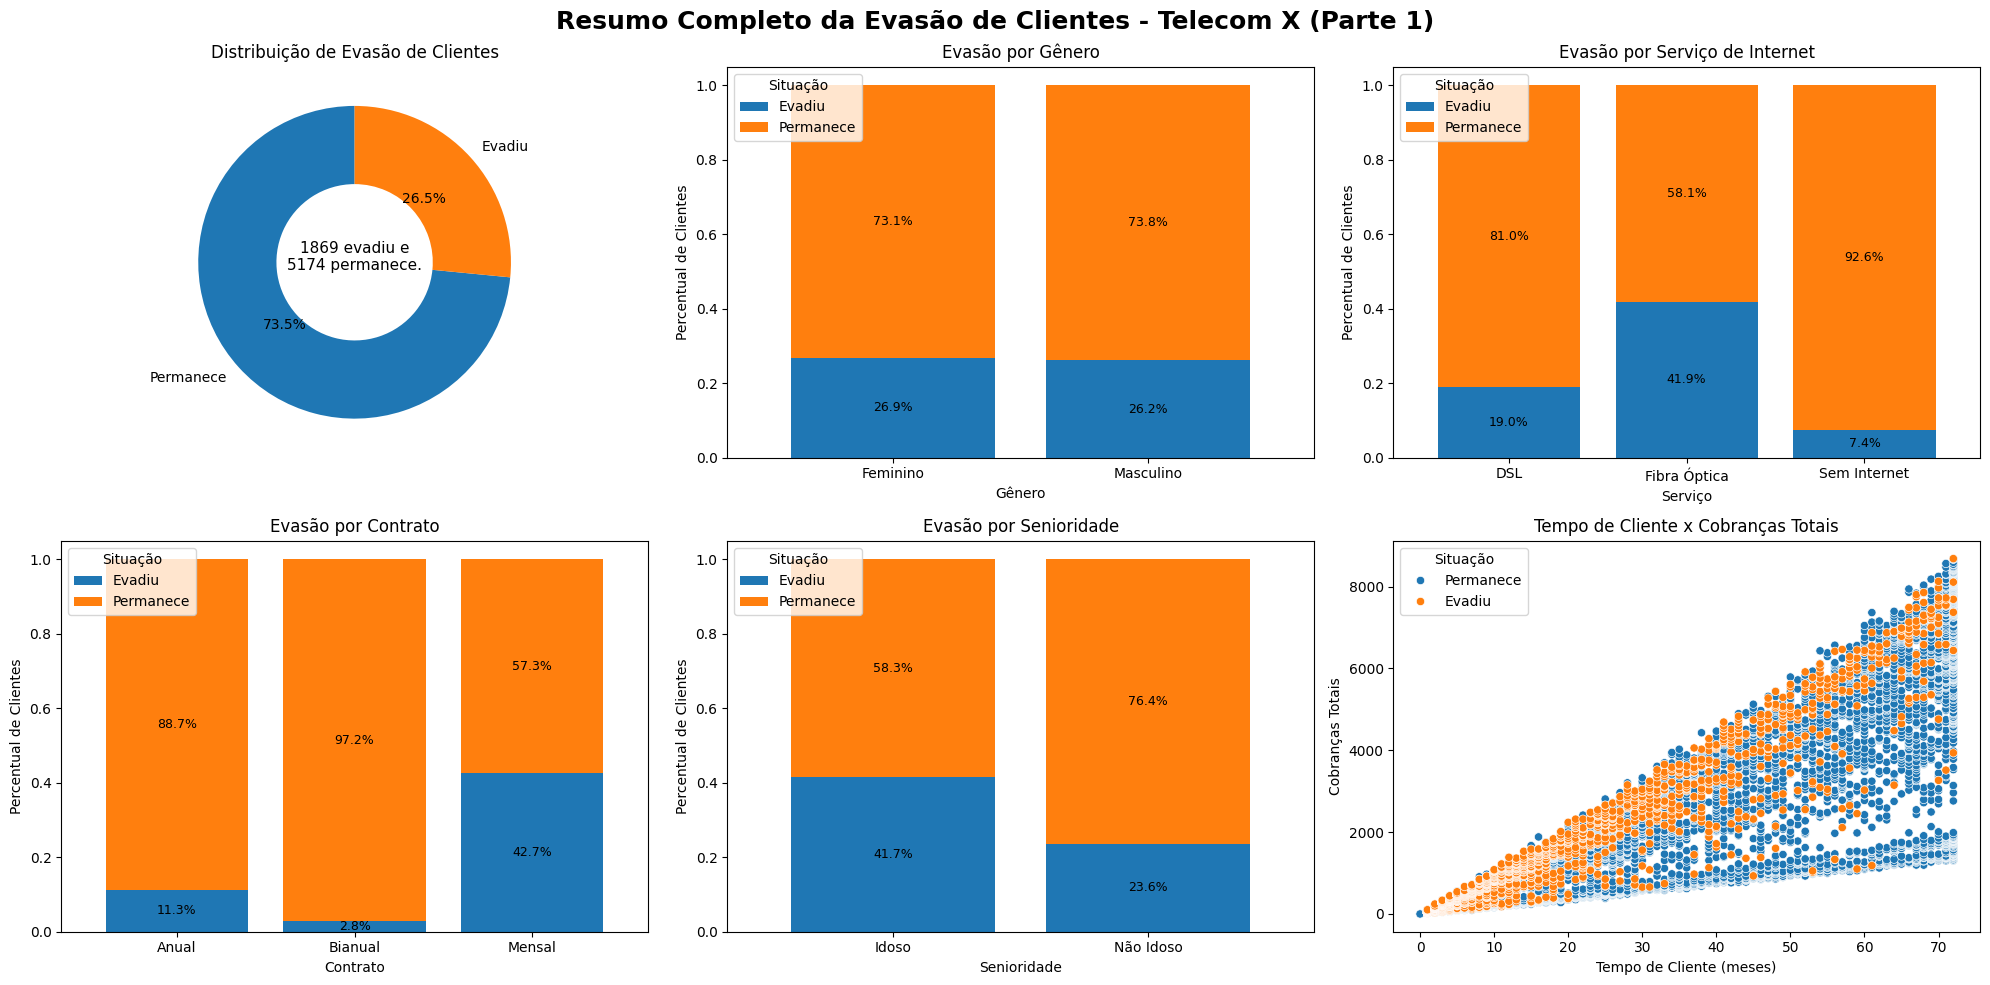

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))


plot_percentual_evasao(axes[0,0])
plot_categorias(axes[0,1], evasao_genero, 'Genero', 'Evasão por Gênero', 'Gênero')
plot_categorias(axes[0,2], evasao_servico, 'Internet', 'Evasão por Serviço de Internet', 'Serviço')
plot_categorias(axes[1,0], evasao_contrato, 'Contrato', 'Evasão por Contrato', 'Contrato')
plot_categorias(axes[1,1], evasao_senioridade, 'Senioridade', 'Evasão por Senioridade', 'Senioridade')
plot_evasao_total(axes[1,2])

fig.suptitle("Resumo Completo da Evasão de Clientes - Telecom X (Parte 1)", fontsize=18, fontweight='bold')
plt.tight_layout()

fig.savefig("resumo_evasao_clientes.png", dpi=300, bbox_inches="tight")
plt.show()
